# **Esercizio 2 : DL**

Utilizza il dataset MNIST fornito da Keras per costruire una semplice rete neurale feedforward (Multi-Layer Perceptron) che riconosca le cifre scritte a mano.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
import pandas as pd

1. Caricamento e preprocessamento del dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [6]:
df_train=pd.DataFrame(X_train)
df_train['label']=y_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [7]:
df_test=pd.DataFrame(X_test)
df_test['label']=y_test
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [8]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

2. Costruzione modello sequenziale

In [9]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

c:\Users\curci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3. Compilazione del modello

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

4. Addestrare il modello sui dati di addestramento.

In [11]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8665 - loss: 0.4516 - val_accuracy: 0.9633 - val_loss: 0.1284
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9636 - loss: 0.1144 - val_accuracy: 0.9702 - val_loss: 0.1024
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0742 - val_accuracy: 0.9700 - val_loss: 0.1017
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9825 - loss: 0.0544 - val_accuracy: 0.9780 - val_loss: 0.0789
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.0439 - val_accuracy: 0.9780 - val_loss: 0.0859
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9884 - loss: 0.0356 - val_accuracy: 0.9787 - val_loss: 0.0868
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9896 - loss: 0.0315 - val_accuracy: 0.9798 - val_loss: 0.0855
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9919 - loss: 0.0236 - 

In [12]:
import matplotlib.pyplot as plt

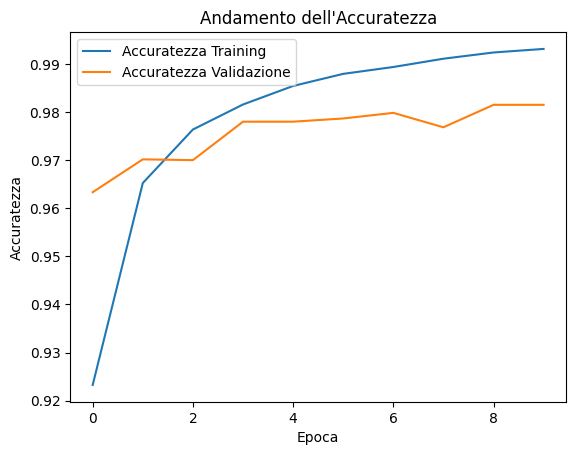

In [13]:
plt.plot(history.history['accuracy'],
label='Accuratezza Training')
plt.plot(history.history['val_accuracy'],
label='Accuratezza Validazione')
plt.xlabel('Epoca')
plt.ylabel('Accuratezza')
plt.legend()
plt.title('Andamento dell\'Accuratezza')
plt.show()

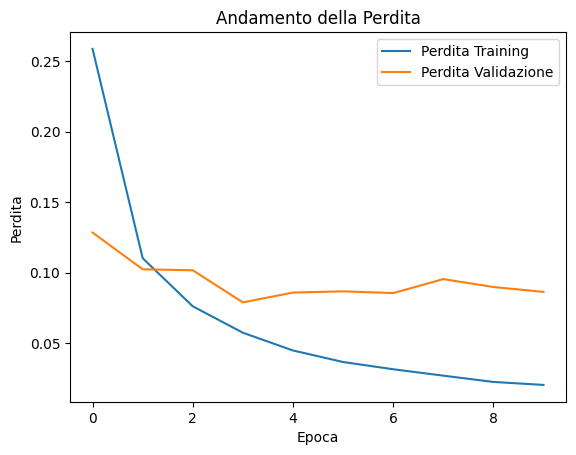

In [14]:
plt.plot(history.history['loss'],
label='Perdita Training')
plt.plot(history.history['val_loss'], label='Perdita Validazione')
plt.xlabel('Epoca')
plt.ylabel('Perdita')
plt.legend()
plt.title('Andamento della Perdita')
plt.show()


5. Valutazioni delle prestazioni

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Perdita sul test set: {test_loss:.4f}')
print(f'Accuratezza sul test set: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9756 - loss: 0.1008
Perdita sul test set: 0.0824
Accuratezza sul test set: 0.9800


6. Predizioni su nuove immagini.

In [16]:
import numpy as np

In [17]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


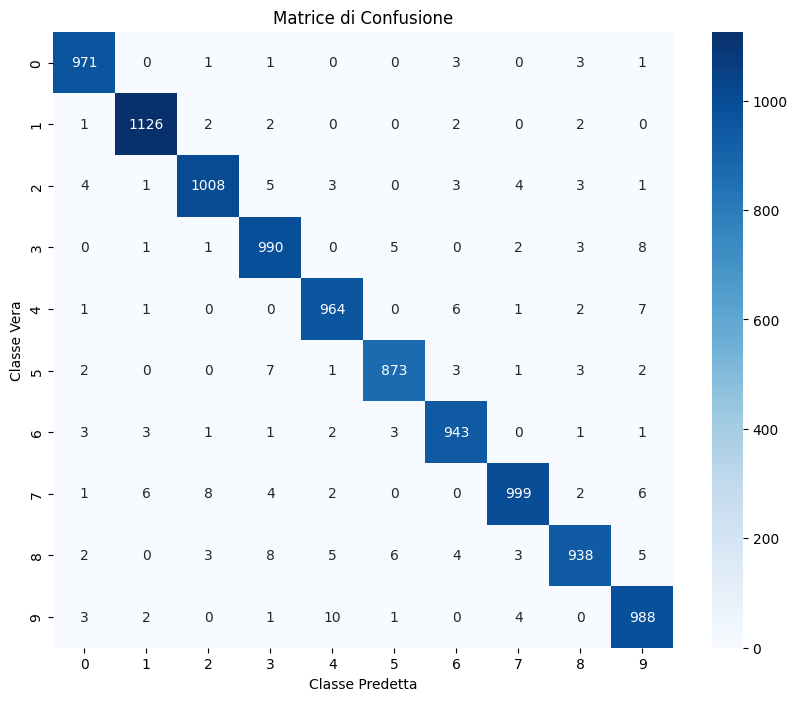

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione')
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Vera')
plt.show()